> 회귀는 분류가 아니므로 모양 다를 수가 없음        
> 회귀는 근처의 점들의 평균으로 점수를 정하며 그 점들의 개수를 의미하는 k를 찾는 것이 중요     
(분류와 달리 k가 짝수여도 됨) 

# 생선의 길이를 사용하여 무게를 예측

In [1]:
import numpy as np

In [2]:
fish_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
fish_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

### 길이와 무게를 산포도로 표현

In [3]:
import matplotlib.pyplot as plt

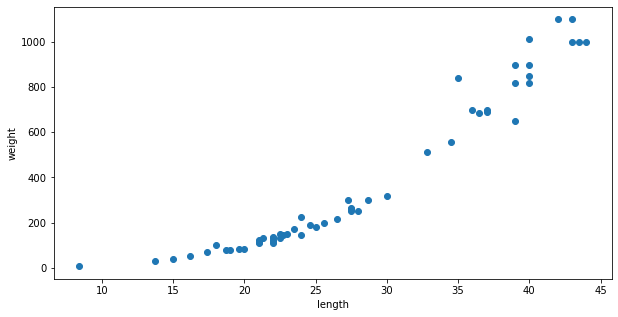

In [4]:
plt.figure(figsize=(10,5))
plt.scatter(fish_length,fish_weight) # fish_length : Feature, fish_weight : target
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

### Train Set, Test Set의 분리


In [5]:
from sklearn.model_selection import train_test_split

train_input,test_input,train_target,test_target=train_test_split(fish_length,fish_weight,random_state=42)

> KNN분류에서 사용되었던 stratify는 분류문제가 아니므로 사용하지 않는다.

In [6]:
# 분리된 결과 확인
print(train_input.shape,test_input.shape)

(42,) (14,)


In [7]:
train_input

array([19.6, 22. , 18.7, 17.4, 36. , 25. , 40. , 39. , 43. , 22. , 20. ,
       22. , 24. , 27.5, 43. , 40. , 24. , 21. , 27.5, 40. , 32.8, 26.5,
       36.5, 13.7, 22.7, 15. , 37. , 35. , 28.7, 23.5, 39. , 21. , 23. ,
       22. , 44. , 22.5, 19. , 37. , 22. , 25.6, 42. , 34.5])

In [8]:
# 1열로 구성된 배열로 재구성
train_input = train_input.reshape(-1,1) # reshape(행,열) , -1 : 몇 개로 구성되었있는지 모를경우
test_input = test_input.reshape(-1,1)

In [9]:
train_input[:10] # dataframe이 아니므로 slicing이용

array([[19.6],
       [22. ],
       [18.7],
       [17.4],
       [36. ],
       [25. ],
       [40. ],
       [39. ],
       [43. ],
       [22. ]])

In [10]:
print(train_input.shape,test_input.shape)

(42, 1) (14, 1)


### 회귀모델 사용

In [11]:
from sklearn.neighbors import KNeighborsRegressor

In [12]:
knr = KNeighborsRegressor()
knr.fit(train_input,train_target)

KNeighborsRegressor()

In [13]:
knr.score(test_input,test_target)

0.992809406101064

### 회귀모델은 분류모델처럼 예측값과 정답값을 비교할 수 없음
### 결정계수($R^2$) : 평균 절대값 오차
$R^2$ = 1 - $(타깃-예측)^2$ 의 합 / $(타깃-평균)^2$ 의 합

In [14]:
from sklearn.metrics import mean_absolute_error

In [15]:
# 테스트 세트에 대한 예측을 만듭니다.
test_prediction = knr.predict(test_input)

# 테스트 세트에 대한 평균 절대값 오차를 계산 합니다.
mae = mean_absolute_error(test_target,test_prediction)
print(mae)

19.157142857142862


### 과대적합(Overfitting)과 과소적합(Underfitting)

In [16]:
# train data로 score 측정
knr.score(train_input,train_target)

0.9698823289099254

In [17]:
# test data로 score 측정
knr.score(test_input,test_target)

0.992809406101064

> train보다 test의 점수가 잘 나왔을 경우를 과소적합이라고 한다.=> 즉, 훈련을 잘못한 것임       
> 보통은 train점수가 test의 점수보다 조금 더 잘나온 과대적합 기준으로 한다.

### knn의 hyper parameter를 조절

In [18]:
# 이웃의 갯수가 default는 5, 이웃의 갯수를 3으로 설정합니다.
# 과소적합을 해결하기 위해 hyper parameter를 줄여야 함(과대적합으로 만들기 위해) 
knr.n_neighbors = 3

# 모델을 다시 훈련합니다.
knr.fit(train_input,train_target)
print("train score : ",knr.score(train_input,train_target))
print("test score : ",knr.score(test_input,test_target))

train score :  0.9804899950518966
test score :  0.9746459963987609


In [19]:
# hyper parameter를 증가할 경우 => 과소적합 발생, 예측률이 더 떨어짐
knr.n_neighbors = 30

# 모델을 다시 훈련합니다.
knr.fit(train_input,train_target)
print("train score : ",knr.score(train_input,train_target))
print("test score : ",knr.score(test_input,test_target))

train score :  0.5880379500164266
test score :  0.6042092841373093


---
# 이웃의 갯수 조절로 확인

K ====> 1
Train : 0.9852830341215901
Test : 0.991309195814175


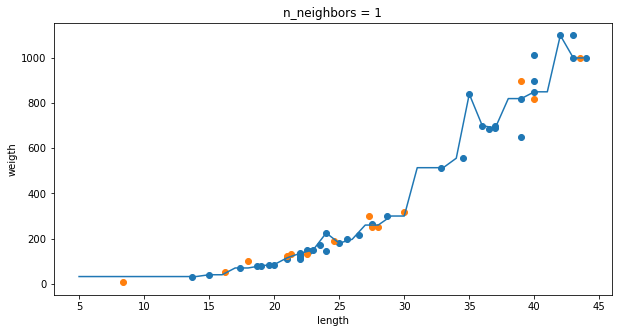



K ====> 3
Train : 0.9804899950518966
Test : 0.9746459963987609


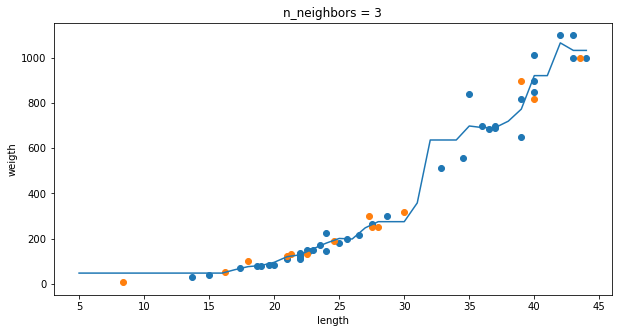



K ====> 5
Train : 0.9698823289099254
Test : 0.992809406101064


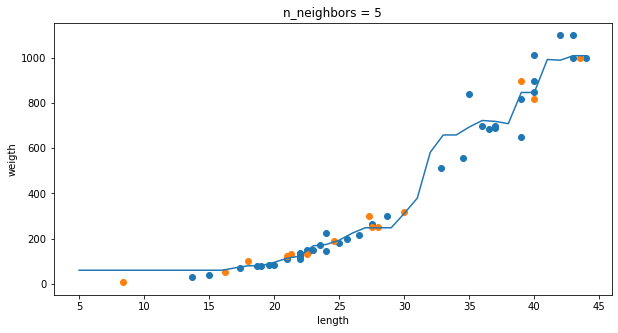



K ====> 10
Train : 0.96164569026043
Test : 0.9737908255822255


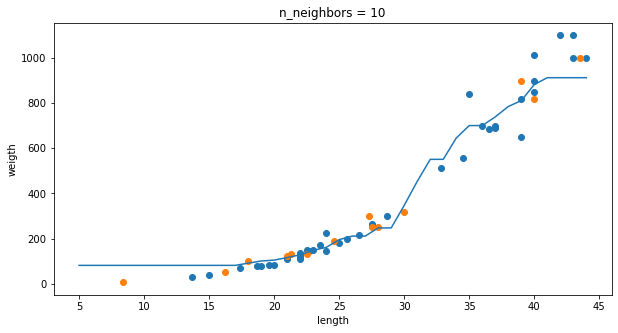

In [20]:
knr = KNeighborsRegressor()

# 5에서 45까지 x좌표 만듭니다.
x = np.arange(5,45).reshape(-1,1)

# n = 1, 3, 5, 10일 때, 예측 결과를 그래프로 그립니다.
for n in [1,3,5,10]:
    # 모델 훈련
    knr.n_neighbors = n
    knr.fit(train_input,train_target)
    print("K ====>",n)
    print("Train :",knr.score(train_input,train_target))
    print("Test :",knr.score(test_input,test_target))

    # 지정한 범위 x에 대한 예측 구하기
    prediction = knr.predict(x)

    # 훈련세트와 검증세트의 예측결과 그래프그리기
    plt.figure(figsize=(10,5))
    plt.scatter(train_input,train_target)
    plt.scatter(test_input,test_target)
    plt.plot(x,prediction)
    plt.title("n_neighbors = %d"%n)
    plt.xlabel("length")
    plt.ylabel("weigth")
    plt.show()
    print("\n")

In [21]:
np.max(fish_length)

44.0

> 점의 근처의 근접하여 선이 그려진다 => 일반화가 잘 되었다는 증거(성능 우수)  
(train과 test의 중간으로 선을 그리는 것이 좋음)       
                      
> train_input을 따라가면 train만 잘 맞추고 test는 잘 못 맞추는 과대적합 문제가 발생 